#**Setting up Google Drive and Importing required Packages**

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Datasets

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Datasets'
/content/gdrive/My Drive/Datasets


In [14]:
#!pip install --upgrade plotly
import pandas as pd 
import numpy as np
from numpy import log
from numpy import where

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.patches as mpatches
from matplotlib import pyplot
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

import gc
from datetime import datetime 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn import datasets, decomposition, preprocessing, model_selection
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast
from keras.models import load_model
from keras import models, layers, activations, losses, optimizers, metrics
from keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric res

#**Reading and Checking the data**

In [15]:
#Reading the data 
data = pd.read_csv('creditcard.csv', na_filter=True)

In [16]:
#Checking the data 
print("Credit Card Fraud Detection data -  rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [17]:
#Having a glimpse at the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#**Exploratory Data Analysis**

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

In [ ]:
#Missing Data Analysis
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

In [ ]:
#Checking Data Imbalance - Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(non_fraud))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


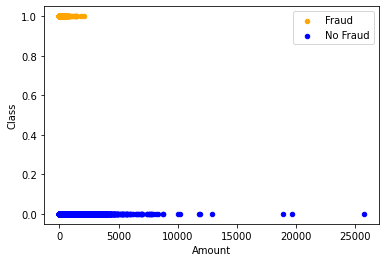

In [ ]:
#Visualizing the data
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='No Fraud', ax=ax)
plt.show()

**Only 0.17% fraudulent transaction out all the transactions. As you can see, our dataset is highly unbalanced, as an overwhelming majority of our data is in the 0 class. This is a problem because we have to give the same amount of opportunities for the model to train from both classes.** 

We will first create the below three models using the original dataset (unbalanced data)

**1. Logistic Regression**

**2. Random Forest CLassifier**

**3. Support Vector Classification with RBF Kernel**

And if we find that there is overfitting, we will appropriately use **oversmapling/undersampling techniques** to balance the dataset and then create models using the same three algorithms as well as **Deep Learning algorithms.**



**Transactions in Time**

In [ ]:
print ("Fraud")
print (data.Time[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Time[data.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



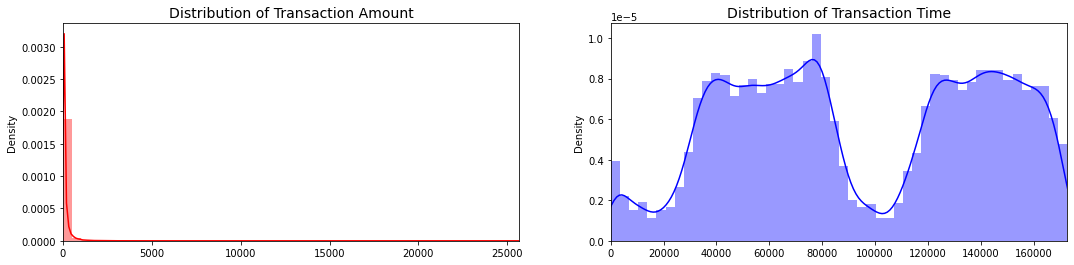

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

We also wanted to understand whether fraudulent transactions occur more often during certain time. However it looks like the time of transaction doesn't really matter.

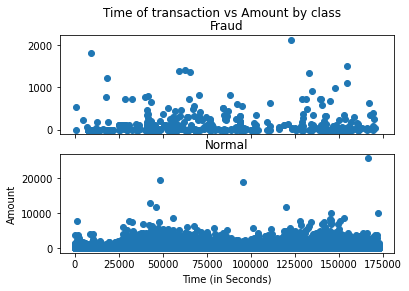

In [ ]:
frauds = data[data.Class == 1]
normal = data[data.Class == 0]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

In [ ]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


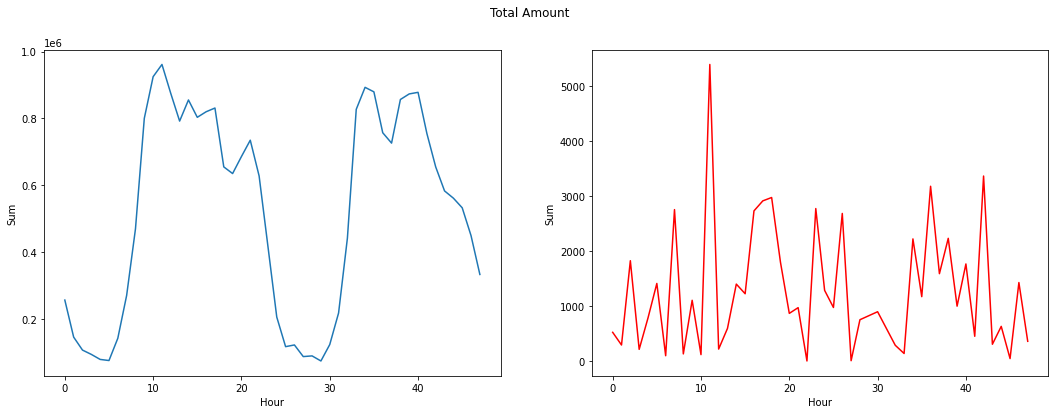

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

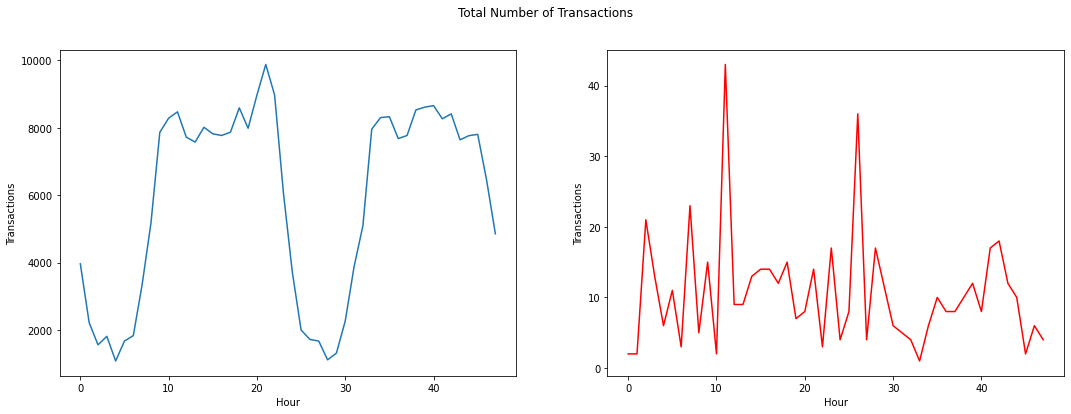

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

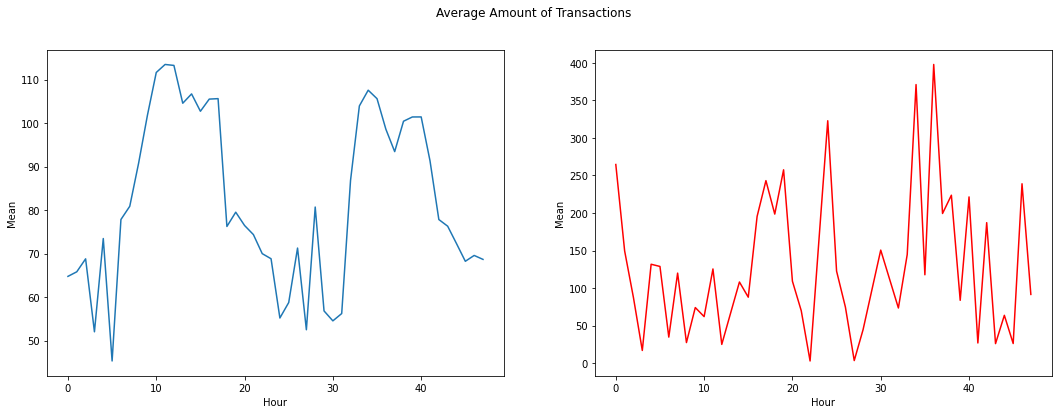

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

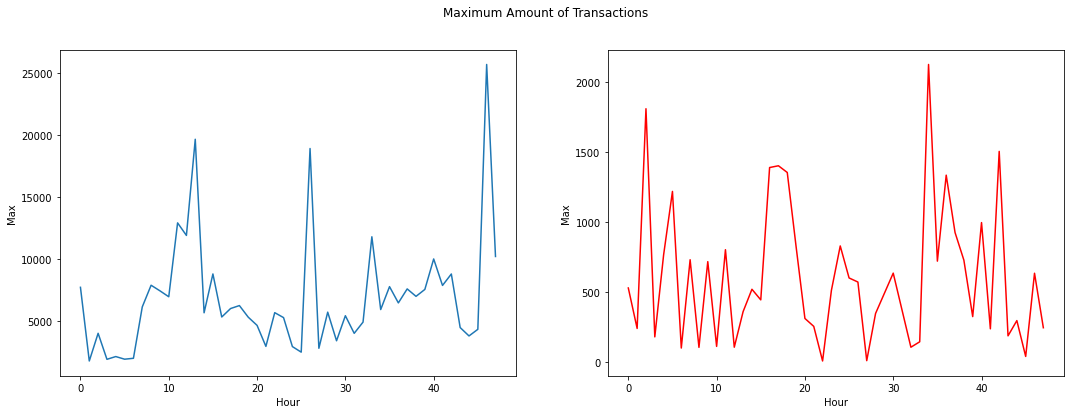

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

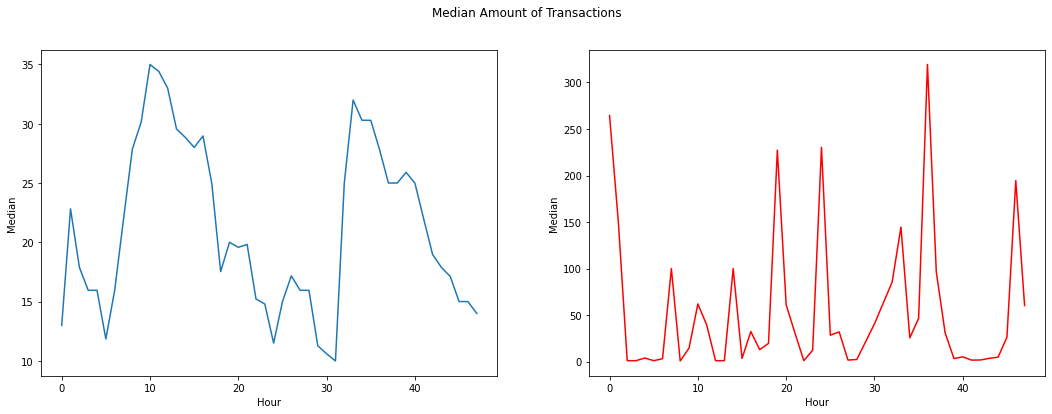

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

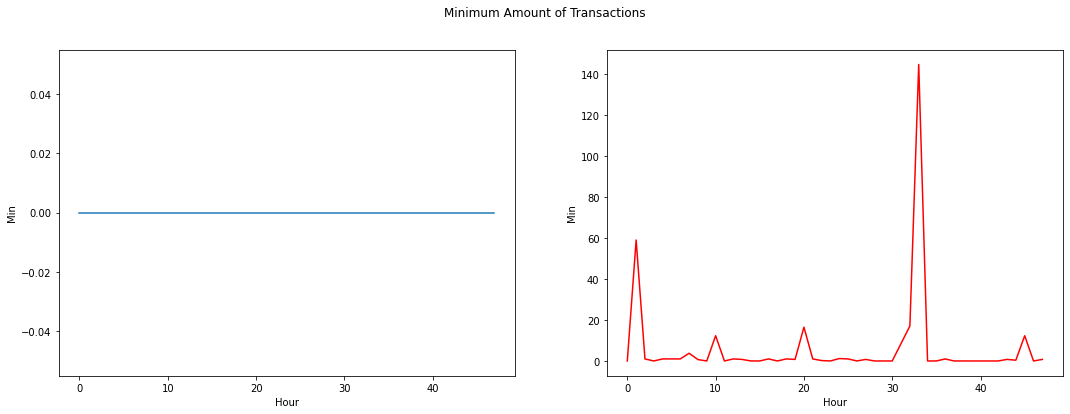

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

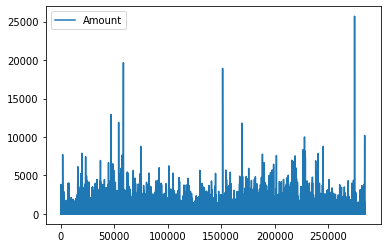

In [ ]:
df1 = data[['Amount']]
df1.plot()

In [ ]:
def stationarity_check(ts):
            
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=8, center=False).mean()
    roll_std = ts.rolling(window=8, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(ts) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

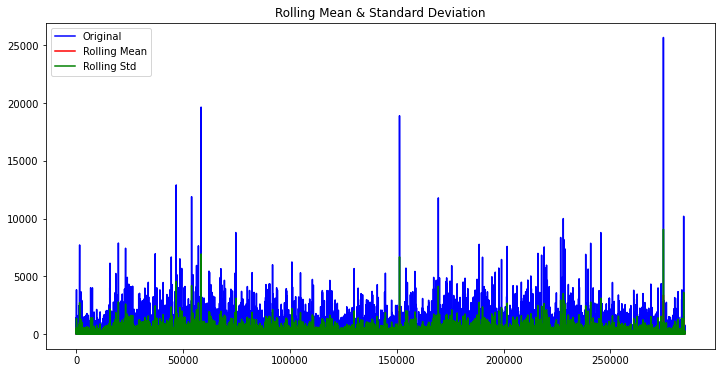


Results of Dickey-Fuller Test: 

Test Statistic                    -46.148397
p-value                             0.000000
#Lags Used                         88.000000
Number of Observations Used    284718.000000
Critical Value (1%)                -3.430373
Critical Value (5%)                -2.861550
Critical Value (10%)               -2.566775
dtype: float64


In [ ]:
stationarity_check(df1.Amount)

We can see that the series is stationary - So lets proceed with the next steps.

#**Data Discovery - Principal Component Analysis(PCA)**

**Since it is a very unbalanced dataset, it is a good candidate to identify fraud through anomalies.**

**We are going to do a smaller plot after decreasing our dimensions from 30 to 3 with Principal Component Analysis. This data has 32 columns where the first column is the time index, 29 unknown features, 1 transaction amount, and 1 class. We will ignore the time index since it is not stationary.**

In [ ]:
df4=data
def show_pca_df4(df4):
	x = df4[df4.columns[1:30]].to_numpy()
	y = df4[df4.columns[30]].to_numpy()

	x = preprocessing.MinMaxScaler().fit_transform(x)
	pca = decomposition.PCA(n_components=3)
	pca_result = pca.fit_transform(x)
	print(pca.explained_variance_ratio_)

	pca_df4 = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
	pca_df4 = pd.concat([pca_df4, pd.DataFrame({'label': y})], axis=1)

	ax = Axes3D(plt.figure(figsize=(8, 8)))
	ax.scatter(xs=pca_df4['pc_1'], ys=pca_df4['pc_2'], zs=pca_df4['pc_3'], c=pca_df4['label'], s=25)
	ax.set_xlabel("pc_1")
	ax.set_ylabel("pc_2")
	ax.set_zlabel("pc_3")
	plt.show()

[0.13501016 0.12577773 0.12031399]


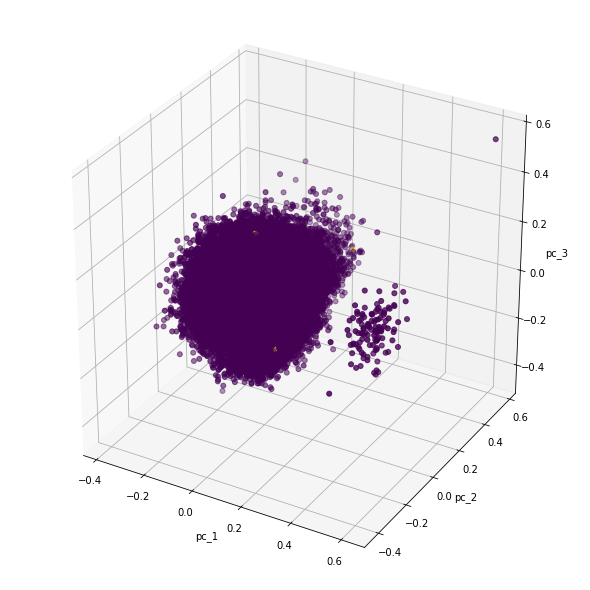

In [ ]:
show_pca_df4(df4)

**Our first reaction could be that there are two clusters and this would be an easy task but fraud data is yellow points! There are three visible yellow points in the large cluster. So let’s subsample the normal data while keeping the number of fraud data.**

[0.20577961 0.14728955 0.09800457]


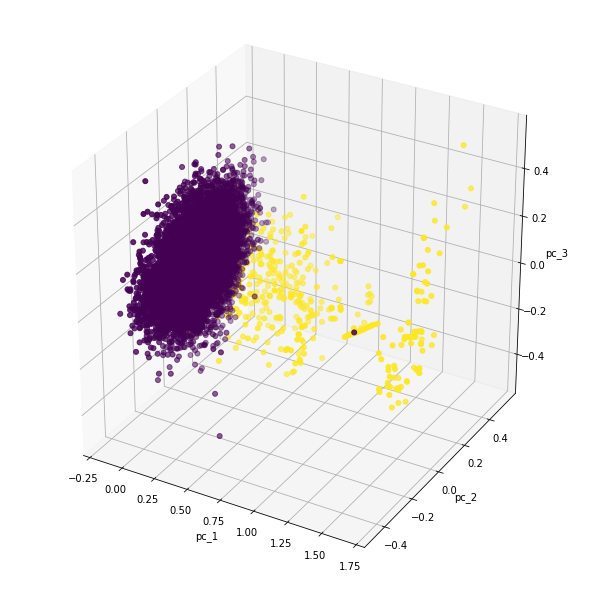

In [ ]:
df4_anomaly = df4[df4[df4.columns[30]] > 0]

df4_normal = df4[df4[df4.columns[30]] == 0].sample(n=df4_anomaly.size, random_state=1, axis='index')

df4 = pd.concat([ df4_anomaly, df4_normal])


show_pca_df4(df4)

**Now it is visible that normal transactions are clustered in a disk while fraud transactions are more distributed.**

#**Scaling the Dataset**

**We have used Robust Scaler as it is less prone to outliers**

In [18]:
#Scaling the data 
df=data
# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True) # removing non-scaled time and
# amount from the dataframe

In [19]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True) # remove from end
df.insert(0, 'scaled_amount', scaled_amount) # place scaled amount at column 1
df.insert(1, 'scaled_time', scaled_time) # place scaled time at column 2

# Amount and Time are now scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#**Features Correlation - Correlation Matrix**

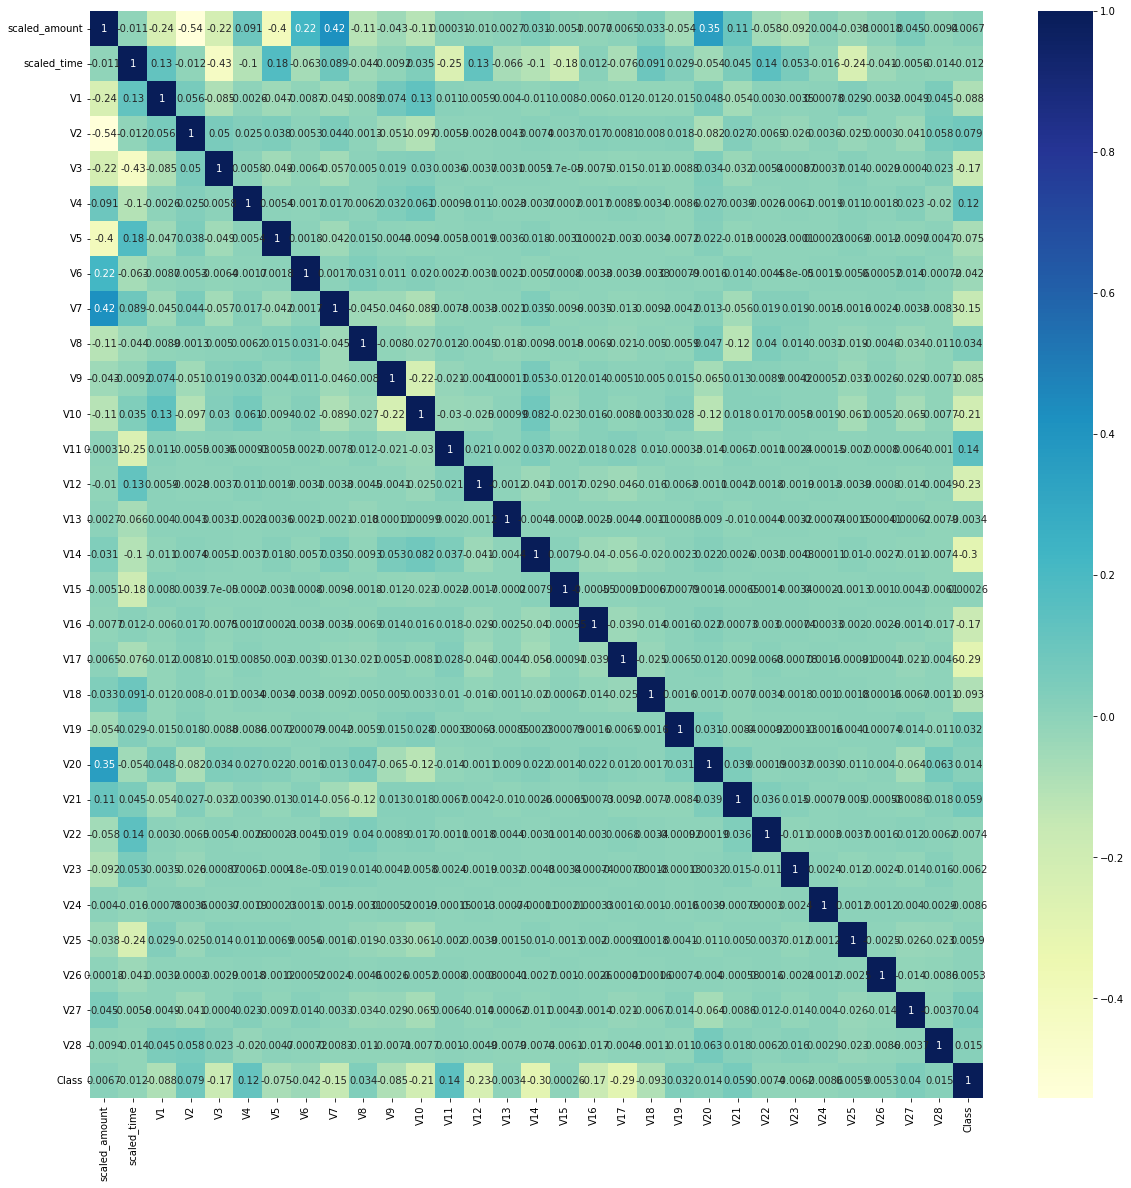

In [32]:
fig, ax = plt.subplots( figsize=(20, 20))
sns.heatmap(df.corr(method='pearson'), cmap="YlGnBu", annot=True)

**The visual is nice, but let's see which ones are the most positively and negatively correlated in text format**

In [ ]:
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

print(sol[0:9])
print(sol[-9:-1])

scaled_amount  V7       0.397311
               V20      0.339403
               V6       0.215981
scaled_time    V5       0.173072
V11            Class    0.154876
scaled_time    V22      0.144059
V4             Class    0.133447
scaled_time    V12      0.124348
               V1       0.117396
dtype: float64
scaled_amount  V1      -0.227709
scaled_time    V25     -0.233083
               V11     -0.247689
V12            Class   -0.260593
V14            Class   -0.302544
V17            Class   -0.326481
scaled_amount  V5      -0.386356
scaled_time    V3      -0.419618
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
print(corr['Class'].sort_values(ascending=False))

Class            1.000000
V11              0.154876
V4               0.133447
V2               0.091289
V21              0.040413
V19              0.034783
V20              0.020090
V8               0.019875
V27              0.017580
V28              0.009536
scaled_amount    0.005632
V26              0.004455
V25              0.003308
V22              0.000805
V23             -0.002685
V15             -0.004223
V13             -0.004570
V24             -0.007221
scaled_time     -0.012323
V6              -0.043643
V5              -0.094974
V9              -0.097733
V1              -0.101347
V18             -0.111485
V7              -0.187257
V3              -0.192961
V16             -0.196539
V10             -0.216883
V12             -0.260593
V14             -0.302544
V17             -0.326481
Name: Class, dtype: float64


We can see from the output which variables are positively and negatively correlated strongly. Some of these are highly correlated.

Now, if we look at the bottom of the second figure, we can see the correlation between the features and the class (fraud or not fraud). We are able to make out the following:

**V2, V4, V11, and V21 are all very positively correlated with the class. This means that the higher the value for one of these features, the more likely it will be a fraud transaction.**

**V10, V12, V14, and V17 are all very negatively correlated with the class. This means that the lower the value for one of these features, the more likely it will be a fraud transaction.**

Let's use boxplots to get a better understanding of the distribution of these 8 features in fraudulent and non fraudulent transactions

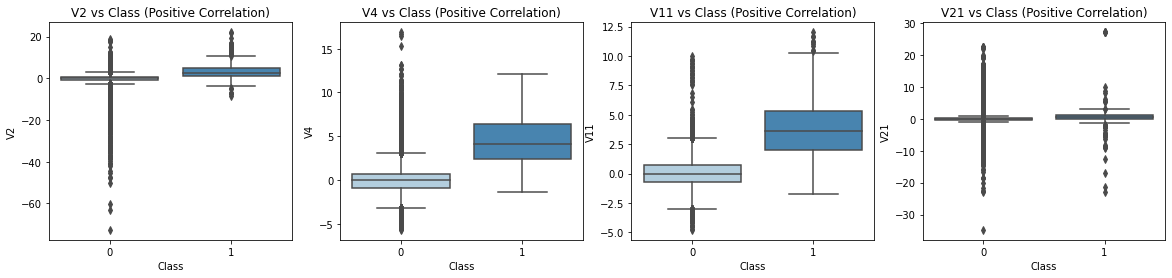

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Creating the boxplot
sns.boxplot(x="Class", y="V2", data=df, palette="Blues", ax=axes[0])
axes[0].set_title('V2 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V4", data=df, palette="Blues", ax=axes[1])
axes[1].set_title('V4 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V11", data=df, palette="Blues", ax=axes[2])
axes[2].set_title('V11 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V21", data=df, palette="Blues", ax=axes[3])
axes[3].set_title('V21 vs Class (Positive Correlation)')

plt.show()

We can see that the features selected here have a statistically higher value when there is a fraudulent transaction. We don't know what these features actually mean, but we (at least) have somewhat of an understanding of their correlation with the class. This can be very useful when we are further preparing our dataset for our model.

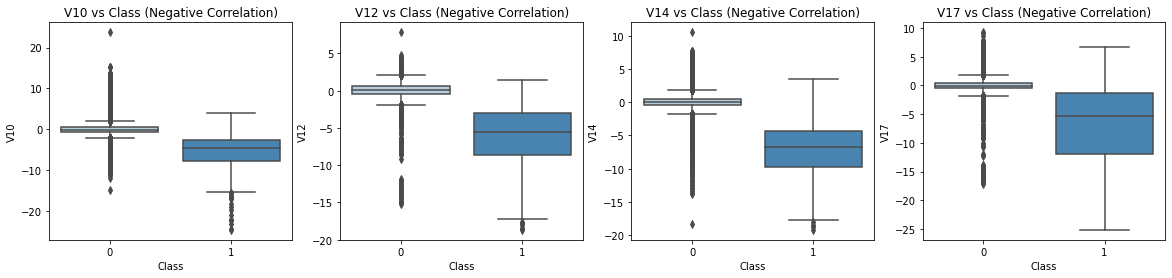

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Creating the boxplot (negative correlation)
sns.boxplot(x="Class", y="V10", data=df, palette="Blues", ax=axes[0])
axes[0].set_title('V10 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V12", data=df, palette="Blues", ax=axes[1])
axes[1].set_title('V12 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V14", data=df, palette="Blues", ax=axes[2])
axes[2].set_title('V14 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V17", data=df, palette="Blues", ax=axes[3])
axes[3].set_title('V17 vs Class (Negative Correlation)')

plt.show()

We can see that the features selected here have a statistically lower value (in the negative numbers) when there is a fraudulent transaction.

#**Anomaly Detection**

Now that we know which are the features with the highest correlation with our classes, we will be removing the extreme outliers from those features in order to improve the accuracy of our models.

We will do this by using the Interquartile Range Method. Essentially, we will create a threshold beyond the lower/upper extremes (25th and 75th percentiles), and any value that passes that threshold will be removed from our dataset.

To get our threshold for removing "extreme outliers:, we will multiply the interquartile range by a number we will judge as reasonable. Of course, there is a tradeoff here when deciding where to place the threshold. If we put it too far from the extremes, we may end up including "extreme" outliers in the dataset. If we are too close from the extremes, then we risk removing "normal" outliers.

We can always come back and play with the threshold to see how it affects our classification models.

**Summary of the next steps:**

**1. Visualize Distributions:** We'll start by visualizing the distribution of the features we are going to use to eliminate outliers.

**2. Determine the threshold:** We will calculate the threshold based on the multiplier we've decided on.

**3. Conditional Dropping:** We will drop any values that pass the threshold.

**4. Boxplot Representation:** We will finally visualize the boxplot to see how much it has changed now that we have removed the "extreme outliers".

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

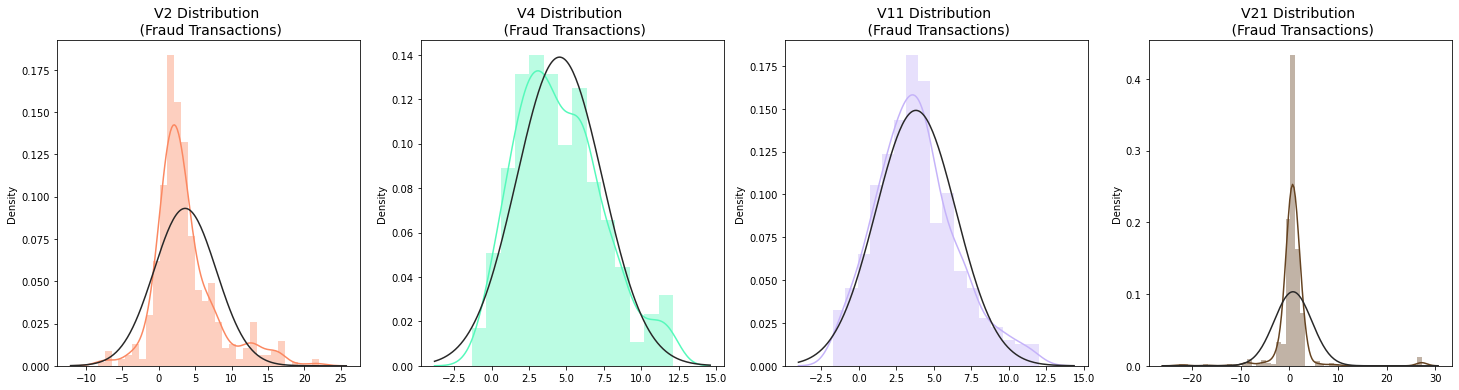

In [20]:
#Positively Correlated Variables Analysis
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 6))

V2_fraud_dist = df['V2'].loc[df['Class'] == 1].values
sns.distplot(V2_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V2 Distribution \n (Fraud Transactions)', fontsize=14)

v4_fraud_dist = df['V4'].loc[df['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)


v11_fraud_dist = df['V11'].loc[df['Class'] == 1].values
sns.distplot(v11_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)

v21_fraud_dist = df['V21'].loc[df['Class'] == 1].values
sns.distplot(v21_fraud_dist,ax=ax4, fit=norm, color='#654321')
ax4.set_title('V21 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

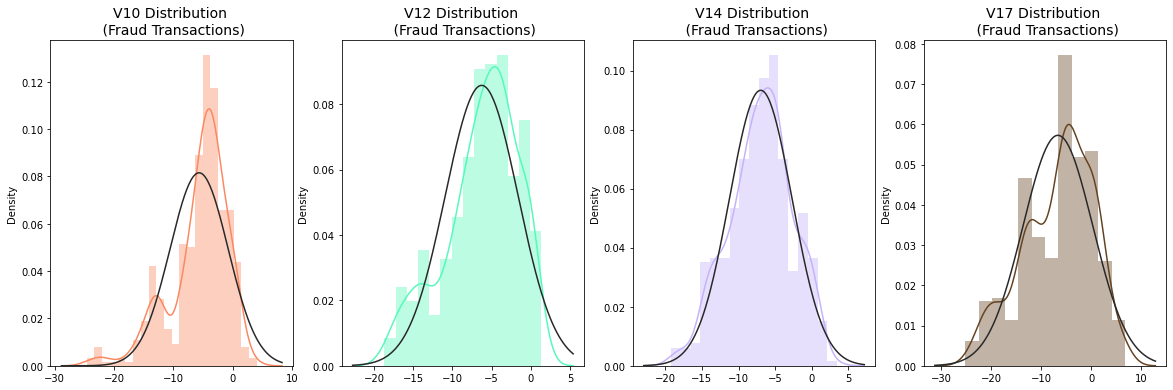

In [21]:
#Negatively Correlated Variable Analysis
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

V10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(V10_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v17_fraud_dist = df['V17'].loc[df['Class'] == 1].values
sns.distplot(v17_fraud_dist,ax=ax4, fit=norm, color='#654321')
ax4.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()


**We will now remove the extreme outliers from some of the features**

In [22]:
multiplier_for_threshold = 1.5

# -----> V14
v14_fraud = df['V14'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * multiplier_for_threshold
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

# check in V14 to find extreme outliers; the ones who pass the threshold
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('V14 outliers:{}'.format(outliers))
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))

df = df.drop(df[(df['V14'] > v14_upper) | (df['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))
print('----' * 44)

# -----> V12
v12_fraud = df['V12'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * multiplier_for_threshold
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

df = df.drop(df[(df['V12'] > v12_upper) | (df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))
print('----' * 44)


# -----> V10
v10_fraud = df['V10'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * multiplier_for_threshold
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

df = df.drop(df[(df['V10'] > v10_upper) | (df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))
print('----' * 44)

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
V14 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]
Feature V14 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 284510
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr: 5.780002635714835
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 284506
-----------------------------------------------------------------------------------------------------------------------------------------

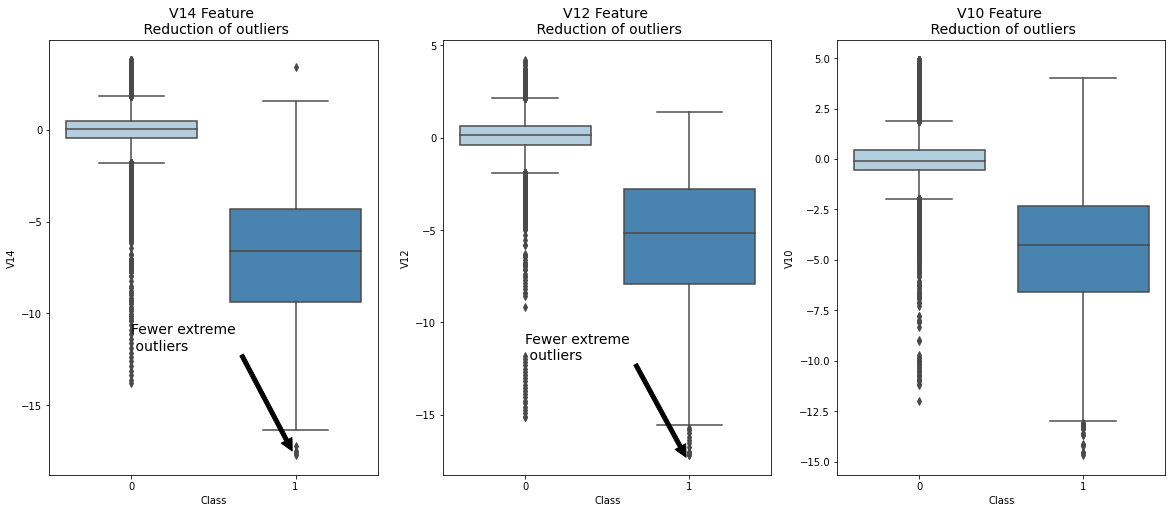

In [23]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=df,ax=ax1, palette="Blues")
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=df, ax=ax2, palette="Blues")
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=df, ax=ax3, palette="Blues")
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()

#**Predictive Modelling using ML Algorithms**

**Lets prepare the dataset now for Predictive Modelling**

In [24]:
df.shape

(283009, 31)

In [25]:
df2=df.reset_index()
df2=df2.drop(["index"],axis=1)
cols = list(df.columns.values)
df2 = df2[['V1', 'V2', 'V3', 'V4', 'V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Class']]
print(df2.head())

X = df2.iloc[:, df2.columns != 'Class']
Y = df2.iloc[:, df2.columns == 'Class']

print(X.shape)
print(Y.shape)

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  

**Splitting the Dataset in Train and Test**

In [26]:
##Splitting the Dataset

x_train, x_val, y_train, y_val = train_test_split(X, Y,test_size = 0.3,random_state=0)

#**Model 1 - Logistic Regression (Unbalanced Data)**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



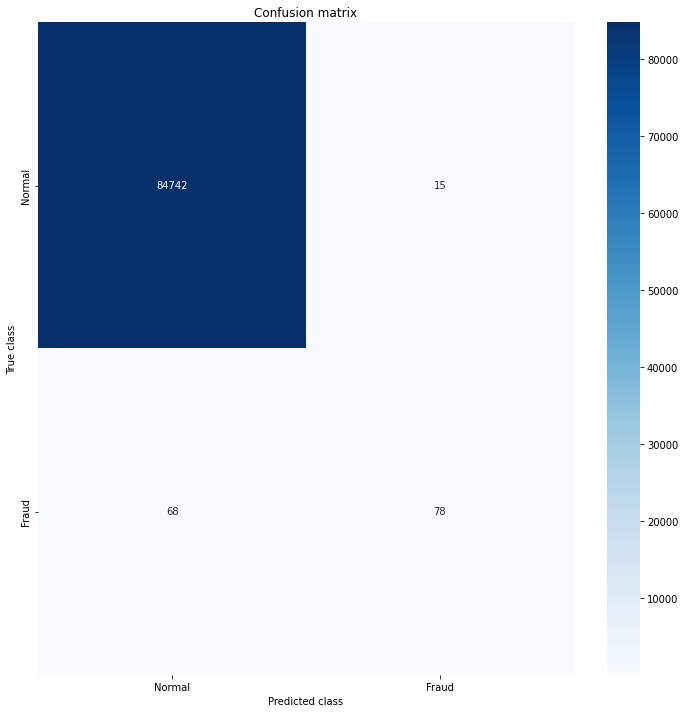

The model used is Logistic Regression
The accuracy is 0.9990224138134106
The precision is 0.8387096774193549
The recall is 0.5342465753424658
The F1-Score is 0.6527196652719666
The AUC-Score is 0.7670347994047769
The Matthews correlation coefficient is 0.6689552511762719


In [ ]:
#Logistic Regression
logR= LogisticRegression()

logR.fit(x_train,y_train)

lrm_yPred = logR.predict(x_val)

##Confusion Matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_val, lrm_yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d",linecolor="Darkblue", cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Displaying the results 

print("The model used is Logistic Regression")
 
acc = accuracy_score(y_val, lrm_yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_val, lrm_yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(y_val, lrm_yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_val, lrm_yPred)
print("The F1-Score is {}".format(f1))
 
AUC = roc_auc_score(y_val, lrm_yPred)
print("The AUC-Score is {}".format(AUC))

MCC = matthews_corrcoef(y_val, lrm_yPred)
print("The Matthews correlation coefficient is {}".format(MCC))


#**Model 2 - Random Forest Classifier (Unbalanced Data)**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



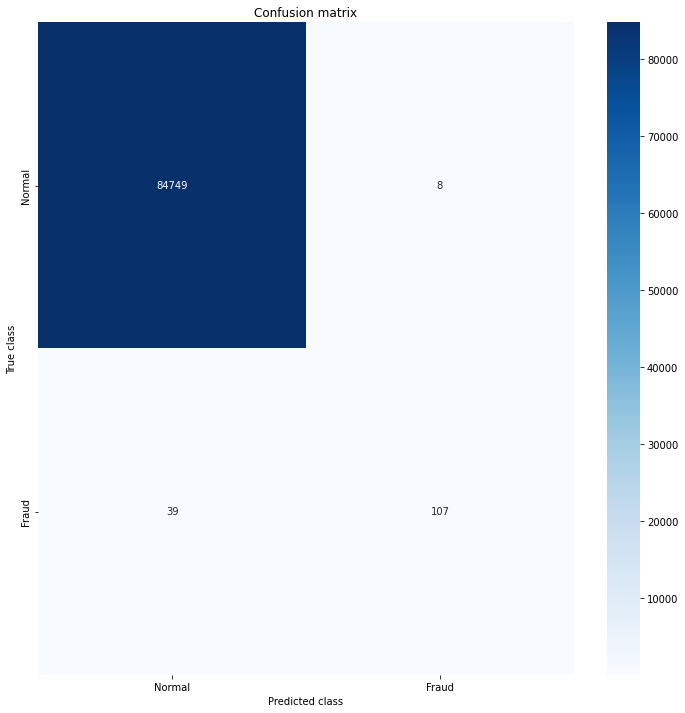

The model used is Random Forest Classifier
The accuracy is 0.9994464270991602
The precision is 0.9304347826086956
The recall is 0.7328767123287672
The F1-Score is 0.8199233716475096
The AUC-Score is 0.8663911624222738
The Matthews correlation coefficient is 0.8255114200786458


In [ ]:
#Random Forest Classifier

rfc= RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=14,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
rfc.fit(x_train,y_train)
rf_yPred = rfc.predict(x_val)

#Confusion Matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_val, rf_yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d",linecolor="Darkblue", cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


#Displaying the results
print("The model used is Random Forest Classifier")
 
acc = accuracy_score(y_val, rf_yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_val, rf_yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(y_val, rf_yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_val, rf_yPred)
print("The F1-Score is {}".format(f1))
 
AUC = roc_auc_score(y_val, rf_yPred)
print("The AUC-Score is {}".format(AUC))

MCC = matthews_corrcoef(y_val, rf_yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

#**Model 3 - Support Vector Classification with RBF Kernel (Unbalanced Data)**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



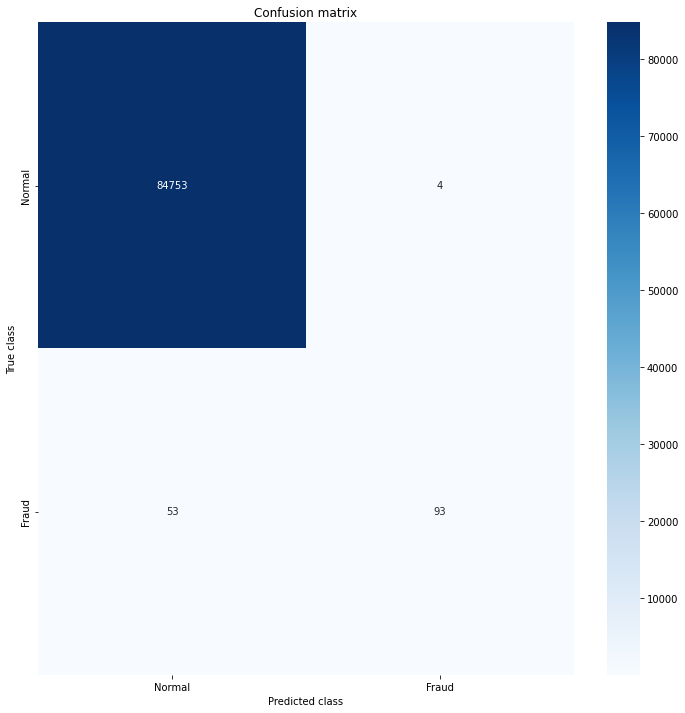

The model used is SVC with RBF Kernel
The accuracy is 0.9993286456308964
The precision is 0.9587628865979382
The recall is 0.636986301369863
The F1-Score is 0.7654320987654322
The AUC-Score is 0.8184695538138766
The Matthews correlation coefficient is 0.7812013304126973


In [ ]:
#SVC with RBF kernel
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
svc_yPred = sv.predict(x_val)

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_val, svc_yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d",linecolor="Darkblue", cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print("The model used is SVC with RBF Kernel")
 
acc = accuracy_score(y_val, svc_yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_val, svc_yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(y_val, svc_yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_val, svc_yPred)
print("The F1-Score is {}".format(f1))
 
AUC = roc_auc_score(y_val, svc_yPred)
print("The AUC-Score is {}".format(AUC))

MCC = matthews_corrcoef(y_val, svc_yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

#**Comparison of the models (unbalanced data) AUC scores and Accuracy** 

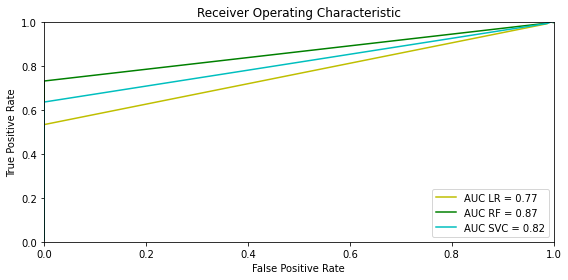

In [ ]:
from sklearn import metrics

fpr_lrm, tpr_lrm, threshold_lrm = metrics.roc_curve(y_val, lrm_yPred)
roc_auc_lrm = metrics.auc(fpr_lrm, tpr_lrm)
fpr_rfo, tpr_rfo, threshold_rfo = metrics.roc_curve(y_val, rf_yPred)
roc_auc_rfo = metrics.auc(fpr_rfo, tpr_rfo)
fpr_svc, tpr_svc, threshold_svc = metrics.roc_curve(y_val, svc_yPred)
roc_auc_svc = metrics.auc(fpr_svc, tpr_svc)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lrm, tpr_lrm, 'y', label = 'AUC LR = %0.2f' % roc_auc_lrm)
plt.plot(fpr_rfo, tpr_rfo, 'g', label = 'AUC RF = %0.2f' % roc_auc_rfo)
plt.plot(fpr_svc, tpr_svc, 'c', label = 'AUC SVC = %0.2f' % roc_auc_svc)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

In [ ]:
#create data
table_data = [["Logistic Regression", 0.9990, 0.6527, 0.8387, 0.5342], 
        ["Random Forest", 0.9994, 0.8199, 0.9304, 0.7328],
        ["SVC (RBF Kernel)", 0.9993, 0.7654, 0.9587, 0.6369]]
  
#define header names
col_names = ["Classifier", "Accuracy", "F1-Score", "Precision", "Recall"]

#display table
print(tabulate(table_data, headers=col_names))

Classifier             Accuracy    F1-Score    Precision    Recall
-------------------  ----------  ----------  -----------  --------
Logistic Regression      0.999       0.6527       0.8387    0.5342
Random Forest            0.9994      0.8199       0.9304    0.7328
SVC (RBF Kernel)         0.9993      0.7654       0.9587    0.6369


The accuracy rate of all the three models was very high and even the Precision and Recall together are not that great in each model.The scores strongly suggests that there is overfitting. Hence we will apply oversampling.

# **Oversampling using SMOTE**

To change the number of values in class 1, there are two possible methods:

**1. Random undersampling** - reduces the number of entries from the majority class

**2. Synthetic oversampling** - synthetically generating new entries for the minority class.

Because we want to provide our model with as much data as possible, we will use a technique called **SMOTE (Synthetic Minority Oversampling Technique)**. The reason that SMOTE was used is that it takes synthetically generates data in between different elements in the minority class.  

In [34]:
col_del = ['scaled_time']
tr_data = df.drop(col_del,axis =1)
tr_data.shape

X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

#SMOTE
# transform the dataset
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

X_r2 = rob_scaler.fit_transform(X_r)

#Splitting into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)
X_train.shape
X_test.shape


Counter({0: 282552, 1: 282552})


(169532, 29)

#**Model 4 - Logistic Regression (Balanced Data)**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



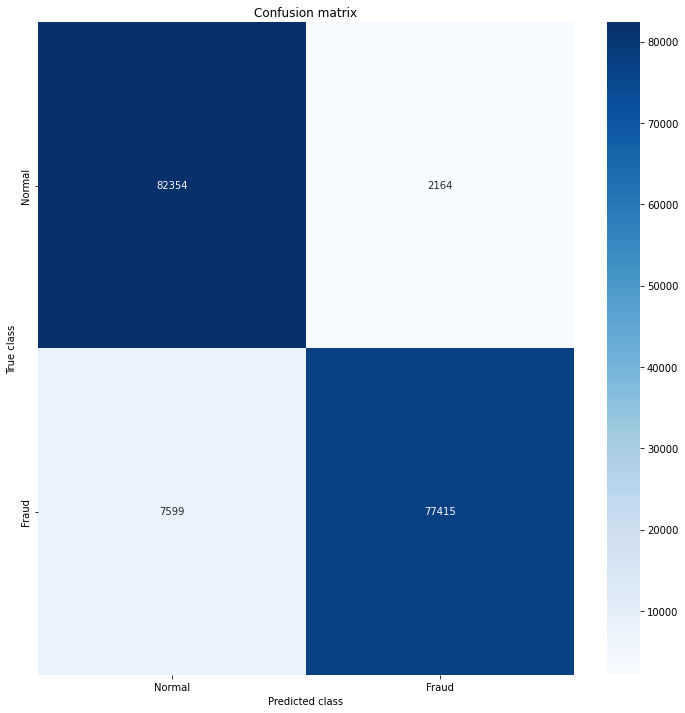

The model used is Logistic Regression
The accuracy is 0.942412052001982
The precision is 0.9728068962917352
The recall is 0.910614722281036
The F1-Score is 0.9406839902061448
The AUC-Score is 0.9425053544673834
The Matthews correlation coefficient is 0.886668525221865


In [33]:


lgr = LogisticRegression()
lgr.fit(X_train, y_train) 
lr_bl_yPred = lgr.predict(X_test)

#Confusion Matrix 
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, lr_bl_yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d",linecolor="Darkblue", cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#Displaying the results
print("The model used is Logistic Regression")
 
acc = accuracy_score(y_test, lr_bl_yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_test, lr_bl_yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(y_test, lr_bl_yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_test, lr_bl_yPred)
print("The F1-Score is {}".format(f1))
 
AUC = roc_auc_score(y_test, lr_bl_yPred)
print("The AUC-Score is {}".format(AUC))

MCC = matthews_corrcoef(y_test, lr_bl_yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

**Checking overfitting by predicting for training data and comparing metrics with the above test data results**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



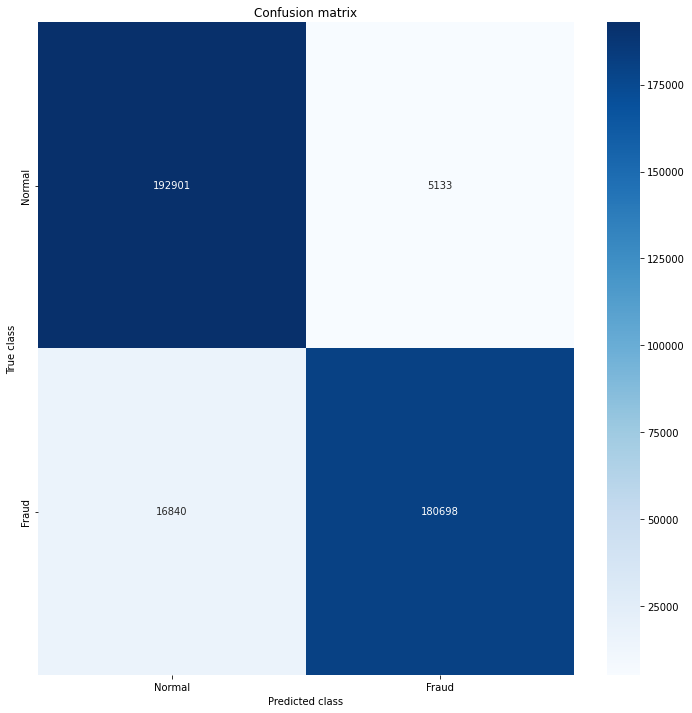

The model used is Logistic Regression
The accuracy is 0.9444525901732175
The precision is 0.9723781285146181
The recall is 0.9147505796353107
The F1-Score is 0.9426844632716782
The AUC-Score is 0.9444153940421823
The Matthews correlation coefficient is 0.8904582184506943


In [28]:


lgr = LogisticRegression()
lgr.fit(X_train, y_train) 
lr_bl_yPred = lgr.predict(X_train)

#Confusion Matrix 
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_train, lr_bl_yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d",linecolor="Darkblue", cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#Displaying the results
print("The model used is Logistic Regression")
 
acc = accuracy_score(y_train, lr_bl_yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_train, lr_bl_yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(y_train, lr_bl_yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_train, lr_bl_yPred)
print("The F1-Score is {}".format(f1))
 
AUC = roc_auc_score(y_train, lr_bl_yPred)
print("The AUC-Score is {}".format(AUC))

MCC = matthews_corrcoef(y_train, lr_bl_yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

#**Model 5 - Random Forest Classifier (Balanced Data)**

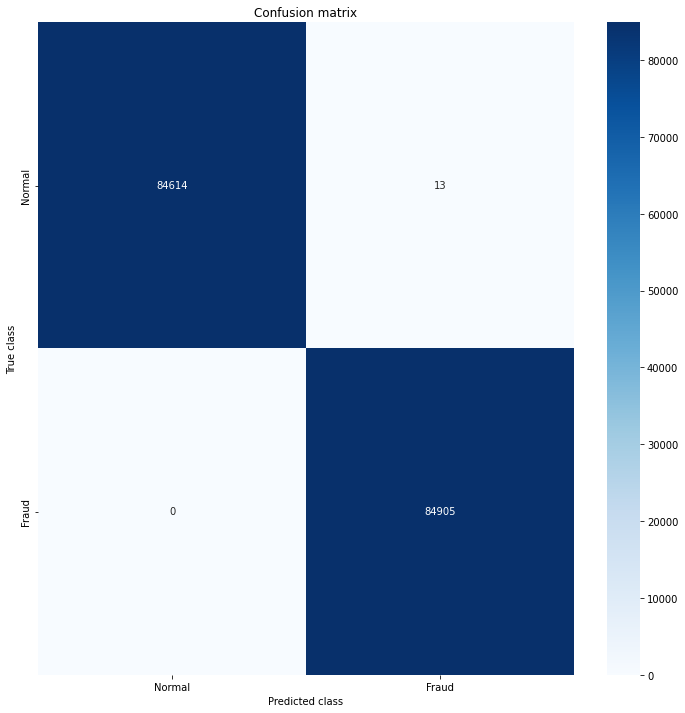

The model used is Random Forest Classifier
The accuracy is 0.9999233183115872
The precision is 0.9998469111378036
The recall is 1.0
The F1-Score is 0.9999234497094033
The AUC-Score is 0.9999231923617757
The Matthews correlation coefficient is 0.9998466479306429


In [ ]:
#Random Forest Classifier

rfc = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=14,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
rfc.fit(X_train, y_train) 
rf_bl_yPred = rfc.predict(X_test)

#Confusion Matrix 
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, rf_bl_yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d",linecolor="Darkblue", cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#Displaying the results
print("The model used is Random Forest Classifier")
 
acc = accuracy_score(y_test, rf_bl_yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_test, rf_bl_yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(y_test, rf_bl_yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_test, rf_bl_yPred)
print("The F1-Score is {}".format(f1))
 
AUC = roc_auc_score(y_test, rf_bl_yPred)
print("The AUC-Score is {}".format(AUC))

MCC = matthews_corrcoef(y_test, rf_bl_yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

**Checking for overfitting by predicting on the train dataset and comparing**

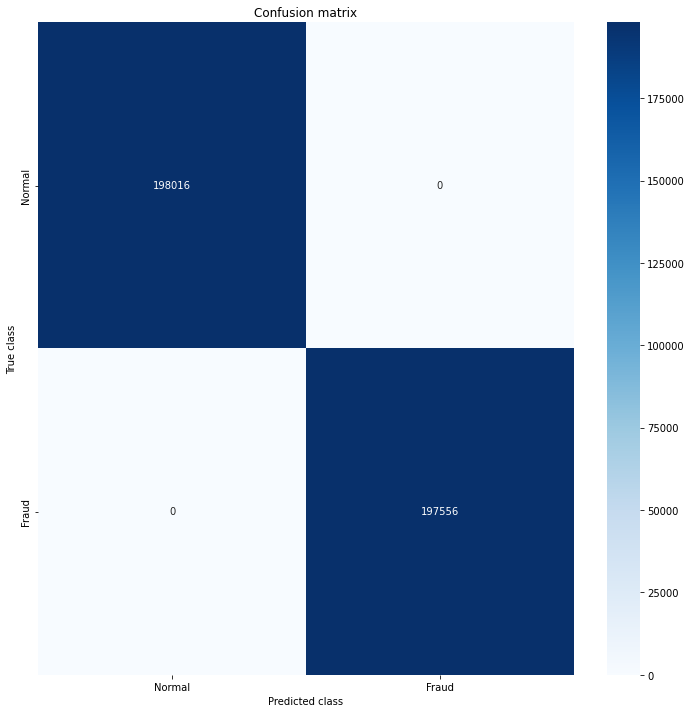

The model used is Random Forest Classifier
The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
The AUC-Score is 1.0
The Matthews correlation coefficient is 1.0


In [35]:
#Random Forest Classifier

rfc = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=14,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
rfc.fit(X_train, y_train) 
rf_bl_yPred = rfc.predict(X_train)

#Confusion Matrix 
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_train, rf_bl_yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d",linecolor="Darkblue", cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#Displaying the results
print("The model used is Random Forest Classifier")
 
acc = accuracy_score(y_train, rf_bl_yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_train, rf_bl_yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(y_train, rf_bl_yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_train, rf_bl_yPred)
print("The F1-Score is {}".format(f1))
 
AUC = roc_auc_score(y_train, rf_bl_yPred)
print("The AUC-Score is {}".format(AUC))

MCC = matthews_corrcoef(y_train, rf_bl_yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

**Again, an exceedingly high accuracy rate, precision, recall, and AUC. We are going to assume that predictions on the training data is going to show the same results for SVC model as well.**

#**Model 6 - Support Vector Classification using RBF Kernel (Balanced Data)**

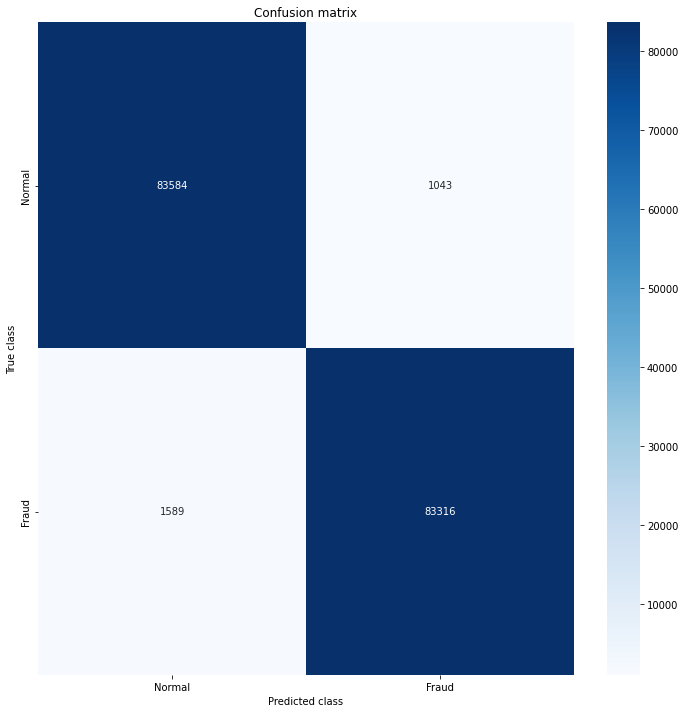

The model used is SVC with RBF Kernel
The accuracy is 0.9844749073921147
The precision is 0.9876361739707678
The recall is 0.9812849655497321
The F1-Score is 0.9844503261177804
The AUC-Score is 0.9844801468773393
The Matthews correlation coefficient is 0.9689701603619822


In [ ]:
#SVC with RBF kernel
sv=SVC(kernel='rbf')
sv.fit(X_train,y_train)
svc_bl_yPred = sv.predict(X_test)

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, svc_bl_yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d",linecolor="Darkblue", cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print("The model used is SVC with RBF Kernel")
 
acc = accuracy_score(y_test, svc_bl_yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_test, svc_bl_yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(y_test, svc_bl_yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_test, svc_bl_yPred)
print("The F1-Score is {}".format(f1))
 
AUC = roc_auc_score(y_test, svc_bl_yPred)
print("The AUC-Score is {}".format(AUC))

MCC = matthews_corrcoef(y_test, svc_bl_yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

#**Comparison of accuracy and AUC scores of model (balanced data)**

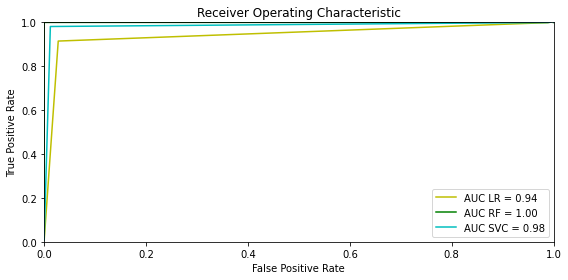

In [ ]:
fpr_lrm_bl, tpr_lrm_bl, threshold_lrm_bl = metrics.roc_curve(y_test, lr_bl_yPred)
roc_auc_lrm_bl = metrics.auc(fpr_lrm_bl, tpr_lrm_bl)
fpr_rfo_bl, tpr_rfo_bl, threshold_rfo_bl = metrics.roc_curve(y_test, rf_bl_yPred)
roc_auc_rfo_bl = metrics.auc(fpr_rfo_bl, tpr_rfo_bl)
fpr_svc_bl, tpr_svc_bl, threshold_svc_bl = metrics.roc_curve(y_test, svc_bl_yPred)
roc_auc_svc_bl = metrics.auc(fpr_svc_bl, tpr_svc_bl)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lrm_bl, tpr_lrm_bl, 'y', label = 'AUC LR = %0.2f' % roc_auc_lrm_bl)
plt.plot(fpr_rfo_bl, tpr_rfo_bl, 'g', label = 'AUC RF = %0.2f' % roc_auc_rfo_bl)
plt.plot(fpr_svc_bl, tpr_svc_bl, 'c', label = 'AUC SVC = %0.2f' % roc_auc_svc_bl)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

In [ ]:
#create data
table_data = [["Logistic Regression", 0.9435, 0.9419, 0.9706, 0.9149], 
        ["Random Forest", 0.9999, 0.9998, 0.9999, 1.0],
        ["SVC (RBF Kernel)", 0.9844, 0.9844, 0.9876, 0.9812]]
  
#define header names
col_names = ["Classifier(Balanced Data)", "Accuracy", "F1-Score", "Precision", "Recall"]

#display table
print(tabulate(table_data, headers=col_names))

Classifier(Balanced Data)      Accuracy    F1-Score    Precision    Recall
---------------------------  ----------  ----------  -----------  --------
Logistic Regression              0.9435      0.9419       0.9706    0.9149
Random Forest                    0.9999      0.9998       0.9999    1
SVC (RBF Kernel)                 0.9844      0.9844       0.9876    0.9812


We can see that even on the balanced dataset using SMOTE, we get very high accuracy rates, with Random Forest algorithm giving a recall of 1. 

***This is where we can clearly see the need of moving to Neural Networks for highly unbalanced data.***

Lets explore some of the alogirthms in Neural Network and see how it is better than conventional ML algorithms in dealing with unbalanced data.

#**Deep Learning Algorithms**

#**Model 7 - Deep Learning using Long Short Term Memory (LSTM)**

In [ ]:
# design network
np.random.seed(7)

train_LSTM_X=X_train
val_LSTM_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format required for LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

train_LSTM_y=y_train
val_LSTM_y=y_test

In [ ]:
input = Input(shape=(1,29))
x=LSTM(50, dropout=0.25,recurrent_dropout=0.2)(input)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
model=Model(input,output)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
20/20 [==============================] - 7s 212ms/step - loss: 0.5507 - accuracy: 0.8028 - val_loss: 0.3565 - val_accuracy: 0.9117
Epoch 2/100
20/20 [==============================] - 4s 192ms/step - loss: 0.3297 - accuracy: 0.8743 - val_loss: 0.2096 - val_accuracy: 0.9272
Epoch 3/100
20/20 [==============================] - 4s 194ms/step - loss: 0.2383 - accuracy: 0.9050 - val_loss: 0.1750 - val_accuracy: 0.9360
Epoch 4/100
20/20 [==============================] - 4s 192ms/step - loss: 0.2024 - accuracy: 0.9221 - val_loss: 0.1609 - val_accuracy: 0.9398
Epoch 5/100
20/20 [==============================] - 4s 183ms/step - loss: 0.1811 - accuracy: 0.9301 - val_loss: 0.1529 - val_accuracy: 0.9403
Epoch 6/100
20/20 [==============================] - 3s 175ms/step - loss: 0.1676 - accuracy: 0.9349 - val_loss: 0.1477 - val_accuracy: 0.9405
Epoch 7/100
20/20 [==============================] - 3s 176ms/step - loss: 0.1607 - accuracy: 0.9359 - val_loss: 0.1444 - val_accuracy: 0.9406

In [ ]:
# summarize model.
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 10)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                12200     
                                                                 
 dense_2 (Dense)             (None, 128)               6528      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,857
Trainable params: 18,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate the model
_, train_acc = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.979, Test: 0.980


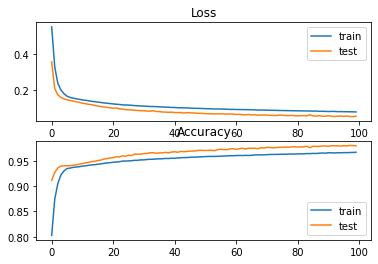

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

**We can see that the reconstruction error on our training and test data seems to converge nicely and same is the case with accuracy.** 

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(val_LSTM_X, verbose=0)

In [ ]:
print(yhat_probs.sum())

86449.48


In [ ]:
for i in range(len(yhat_probs)):
  if yhat_probs[i][0]>0.5:
    yhat_probs[i][0] = int(1)
  else:
    yhat_probs[i][0] = int(0)

In [ ]:
print(yhat_probs)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [ ]:
val_LSTM_y = val_LSTM_y.values.reshape(-1,1)
print(val_LSTM_y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


Accuracy: 0.979921
Precision: 0.973119
Recall: 0.987155
Confusion matrix, without normalization
[[82360  2314]
 [ 1090 83768]]


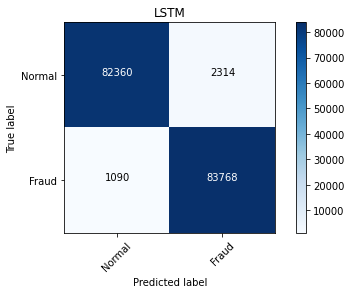

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_probs)
print('Recall: %f' % recall)


%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=yhat_probs)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']

plot_confusion_matrix(cm=cm, classes=labels, title='LSTM')

#**Model 8 - Deep Learning using Attention based Neural Network**

In [ ]:
#Attention based auto-encoders
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
inputs1=Input((1,29))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model1.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=30000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
14/14 [==============================] - 11s 797ms/step - loss: 0.2907 - accuracy: 0.8970 - val_loss: 0.2610 - val_accuracy: 0.9028
Epoch 2/100
14/14 [==============================] - 14s 1s/step - loss: 0.2624 - accuracy: 0.9016 - val_loss: 0.2351 - val_accuracy: 0.9054
Epoch 3/100
14/14 [==============================] - 12s 889ms/step - loss: 0.2397 - accuracy: 0.9084 - val_loss: 0.2131 - val_accuracy: 0.9164
Epoch 4/100
14/14 [==============================] - 11s 767ms/step - loss: 0.2218 - accuracy: 0.9156 - val_loss: 0.1948 - val_accuracy: 0.9250
Epoch 5/100
14/14 [==============================] - 8s 532ms/step - loss: 0.2067 - accuracy: 0.9219 - val_loss: 0.1800 - val_accuracy: 0.9303
Epoch 6/100
14/14 [==============================] - 7s 520ms/step - loss: 0.1955 - accuracy: 0.9254 - val_loss: 0.1684 - val_accuracy: 0.9344
Epoch 7/100
14/14 [==============================] - 7s 526ms/step - loss: 0.1859 - accuracy: 0.9286 - val_loss: 0.1588 - val_accuracy: 0.937

In [ ]:
# evaluate the model
_, train_acc = model1.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model1.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.958, Test: 0.959


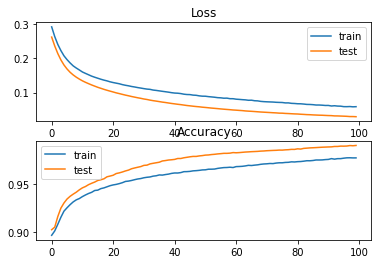

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# predict probabilities for test set
yhat_probs1 = model1.predict(val_LSTM_X, verbose=0)

In [ ]:
print(yhat_probs1)

[[9.9984288e-01]
 [4.4433673e-05]
 [1.1728495e-02]
 ...
 [9.9988353e-01]
 [1.6501546e-04]
 [9.9991071e-01]]


In [ ]:
for i in range(len(yhat_probs1)):
  if yhat_probs1[i][0]>0.5:
    yhat_probs1[i][0] = int(1)
  else:
    yhat_probs1[i][0] = int(0)

In [ ]:
#val_LSTM_y = val_LSTM_y.values.reshape(-1,1)
print(val_LSTM_y)

521534    1
151444    0
120767    0
416680    1
529762    1
         ..
3005      0
36786     0
562963    1
47383     0
293132    1
Name: Class, Length: 169532, dtype: int64


Accuracy: 0.989672
Precision: 0.986507
Recall: 0.992903
Confusion matrix, without normalization
[[83704  1150]
 [  601 84077]]


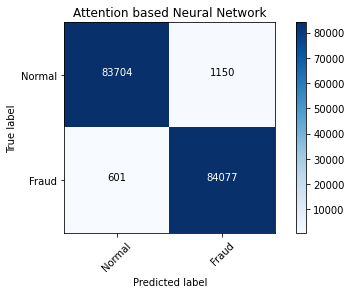

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_probs1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_probs1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_probs1)
print('Recall: %f' % recall)

cm1 = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_probs1)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']

plot_confusion_matrix(cm=cm1, classes=labels, title='Attention based Neural Network', normalize=False)

#**Comparison of Accuracy Scores for LSTM and Attention based Neural Network**

In [ ]:
#create data
table_data = [["LSTM", 0.9799, 0.9731, 0.9871], 
        ["Attention based NN", 0.9896, 0.9865, 0.9929]]      
  
#define header names
col_names = ["Neural Network Algorithm", "Accuracy", "Precision", "Recall"]

#display table
print(tabulate(table_data, headers=col_names))

Neural Network Algorithm      Accuracy    Precision    Recall
--------------------------  ----------  -----------  --------
LSTM                            0.9799       0.9731    0.9871
Attention based NN              0.9896       0.9865    0.9929


**A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).**

***Lets now explore a different Neural Network Technique which will calculate the mean squared error (mse) for normal transactions and calculate a threshold value which is 99 percentile of all mean square error values.***

#**Model 9 - Deep Learning using TF AutoEncoder (Mean Square Error)**

**The Autoencoder will encode our data into a subspace and decode the feature back while normalizing the data. Our expectation is autoencoder will learn the features of normal transactions and the input will be similar to output when applied. For anomalies, the input and the output will be significantly different since it is unexpected data.**

The good part of this approach is **it allows us to use unsupervised learning and we usually have plenty of normal transaction data.** Data labeling is usually expensive, hard, and in some cases unavailable. Manual data labeling also includes human interaction which causes human biased implementations. It can be seen that in the model training we only use normal transaction features and not the labels.

Let’s load data and train our autoencoder:

In [ ]:
col_del = ['scaled_time']
df = df.drop(col_del,axis =1)

In [ ]:
x = df[df.columns[0:29]].to_numpy()
y = df[df.columns[29]].to_numpy()

In [ ]:
df4 = pd.concat([pd.DataFrame(x), pd.DataFrame({'anomaly': y})], axis=1)
normal_events = df4[df4['anomaly'] == 0]
abnormal_events = df4[df4['anomaly'] == 1]


In [ ]:
normal_events = normal_events.loc[:, normal_events.columns != 'anomaly']
abnormal_events = abnormal_events.loc[:, abnormal_events.columns != 'anomaly']

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(df4.drop('anomaly', 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



MinMaxScaler()

**We will train our autoencoder only on non fraudulent cases**

In [ ]:
scaled_data = scaler.transform(normal_events)

In [ ]:
train_data, test_data = model_selection.train_test_split(scaled_data, test_size=0.2)

In [ ]:
n_features = x.shape[1]
print(n_features)

29


**Building the AutoEncoder - We are going to build an autoencoder with 3 layer encoder and 2 layer decoder**


The Autoencoder will encode our data into a subspace and decode the feature back while normalizing the data. **Our expectation is autoencoder will learn the features of normal transactions and the input will be similar to output when applied. For anomalies, the input and the output will be significantly different since it is unexpected data.**

The good part of this approach is it allows us to use unsupervised learning and we usually have plenty of normal transaction data. Data labeling is usually expensive, hard, and in some cases unavailable. Manual data labeling also includes human interaction which causes human biased implementations. It can be seen that in the model training we only use normal transaction features and not the labels.

Let’s load data and train our autoencoder:

In [ ]:
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=20, activation=activations.relu, input_shape=[n_features]))
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=10, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=10, activation=activations.relu, input_shape=[5]))
decoder.add(layer=layers.Dense(units=20, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.sigmoid))

autoencoder = models.Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(
	loss=losses.MSE,
	optimizer=tf.optimizers.Adam(),
	metrics=[metrics.mean_squared_error])

Epoch 1/100
7064/7064 [==============================] - 30s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 2/100
7064/7064 [==============================] - 22s 3ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 3/100
7064/7064 [==============================] - 22s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/100
7064/7064 [==============================] - 22s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 5/100
7064/7064 [==============================] - 22s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6/100
7064/7064 [==============================] - 22s 3ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoc

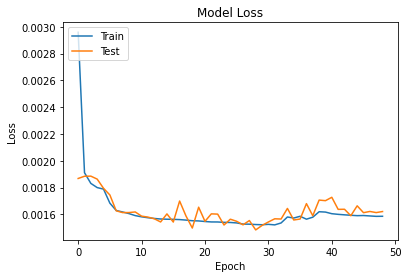

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=20, restore_best_weights=True)
history = autoencoder.fit(x=train_data, y=train_data, epochs=100, verbose=1, validation_data=[test_data, test_data], callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**My model settles around validation loss of 0.0016.**

In [ ]:
autoencoder.save('autoencoder.h5')

In [ ]:
from keras.models import load_model
autoencoder = load_model('autoencoder.h5')

Our model is a bit different this time. It doesn't know how to predict new values. But we don't need that. In order to predict whether or not a new/unseen transaction is normal or fraudulent, we'll calculate the reconstruction error from the transaction data itself. ***If the error is larger than a predefined threshold, we'll mark it as a fraud (since our model should have a low error on normal transactions). Let's pick that value:***

In [ ]:
train_predicted_x = autoencoder.predict(x=train_data)
train_events_mse = losses.mean_squared_error(train_data, train_predicted_x)
cut_off = np.percentile(train_events_mse, 99)
print('cut_off:', cut_off)
# cut_off: 0.005458917468786241

cut_off: 0.005490412563085556


***We found our threshold (cut_off) as 0.0054. We will consider a transaction as an anomaly if the mean squared error is higher than 0.0054. Let’s select 100 fraud samples and 100 normal samples and plot it against the threshold***

In [ ]:
#####
plot_samples = 100
# normal event
real_x = test_data[:plot_samples].reshape(plot_samples, n_features)
predicted_x = autoencoder.predict(x=real_x)
normal_events_mse = losses.mean_squared_error(real_x, predicted_x)
normal_events_df = pd.DataFrame({
	'mse': normal_events_mse,
	'n': np.arange(0, plot_samples),
	'anomaly': np.zeros(plot_samples)})

In [ ]:
# abnormal event
abnormal_x = scaler.transform(abnormal_events)[:plot_samples].reshape(plot_samples, n_features)
predicted_x = autoencoder.predict(x=abnormal_x)
abnormal_events_mse = losses.mean_squared_error(abnormal_x, predicted_x)
abnormal_events_df = pd.DataFrame({
	'mse': abnormal_events_mse,
	'n': np.arange(0, plot_samples),
	'anomaly': np.ones(plot_samples)})

mse_df = pd.concat([normal_events_df, abnormal_events_df])
mse_df.reset_index(inplace=True,drop=True)

In [ ]:
#Changing cutoff as per industry standards for better results
cut_off = 1.57

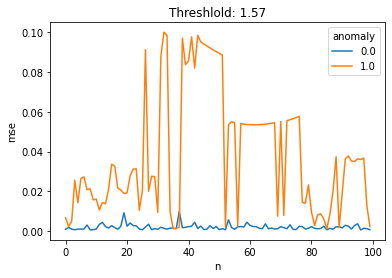

In [ ]:
plot = sns.lineplot(x=mse_df.n, y=mse_df.mse, hue=mse_df.anomaly)

line = lines.Line2D(
	xdata=np.arange(0, plot_samples),
	ydata=np.full(plot_samples, cut_off),
	color='#CC2B5E',
	linewidth=1.5,
	linestyle='dashed')

plot.add_artist(line)
plt.title('Threshlold: {threshold}'.format(threshold=cut_off))
plt.show()


**It is visible that most of the fraudulent transactions have high mean squared errors compared to normal transactions. It looks very promising.**

We gave up on 5% of the normal transactions. There are still fraud transactions that are below the threshold. This can potentially be improved by using better feature extraction since it seems like some fraud data has very similar features to normal transactions. Some valuable features for credit card fraud are the number of transactions in the previous hour/day/week, if the transaction initiated in a different country than the issued country.

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(error_df.true_class, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(error_df.true_class, y_pred)
print('Recall: %f' % recall)

#**CONCLUSION**

In [ ]:
#create data
table_data = [["Logistic Regression(Unbalanced)", 0.9990, 0.8387, 0.5342], 
        ["Random Forest(Unbalanced)", 0.9994, 0.9304, 0.7328],
        ["SVC-RBF Kernel(Unbalanced)", 0.9993, 0.9587, 0.6369],
        ["Logistic Regression(Balanced)", 0.9435, 0.9706, 0.9149], 
        ["Random Forest(Balanced)", 0.9999, 0.9999, 1.0],
        ["SVC-RBF Kernel(Balanced)", 0.9844, 0.9876, 0.9812],
        ["LSTM based NN (Balanced)", 0.9799, 0.9731, 0.9871], 
        ["Attention based NN(Balanced)", 0.9896, 0.9865, 0.9929]]  


  
#define header names
col_names = ["Algorithm", "Accuracy", "Precision", "Recall"]

#display table
print(tabulate(table_data, headers=col_names))

Algorithm                          Accuracy    Precision    Recall
-------------------------------  ----------  -----------  --------
Logistic Regression(Unbalanced)      0.999        0.8387    0.5342
Random Forest(Unbalanced)            0.9994       0.9304    0.7328
SVC-RBF Kernel(Unbalanced)           0.9993       0.9587    0.6369
Logistic Regression(Balanced)        0.9435       0.9706    0.9149
Random Forest(Balanced)              0.9999       0.9999    1
SVC-RBF Kernel(Balanced)             0.9844       0.9876    0.9812
LSTM based NN (Balanced)             0.9799       0.9731    0.9871
Attention based NN(Balanced)         0.9896       0.9865    0.9929


**- Conventional ML algorithms such as Logistic Regression, Random Forest and SVC do not tend to give precise results on unbalanced datasets. There is a strong chance of the model being overfitted.**

**- On balanced datasets, traditional ML algorithms can be used for better results, however the only drawback would be that they need lot of domain expertise and human intervention (supervised learning) and are only capable of what they are designed for; nothing more, nothing less. For the rest of the world, that’s where deep learning holds a bit more promise.**

**- For smaller datasets such as the one we used (~285,00 rows) traditional machine learning algorithms like SVC with RBF Kernel gave much better results as compared to deep learning algorithms like LSTM.**

**- Deep Learning algorithms takes a long time to train due to the substantial number of parameters, however, are much suited for big and unbalanced datasets as was evident for the results obtained by Autoencoder model where the loss function was reduced to as low as 0.0016 with just a 3-layer encoder and 2-layer decoder.**

**- Autoencoders would be particularly useful in setting a threshold for mean squared error based on which normal and fraud transactions can be distinguished. E.g., If a bank has 1000 potential fraud cases coming in for review per day, 1 hour to review the suspect cases, and they spend 0.1 hours on average per case. Then one has a capacity to review 10 cases, or 1% of the total. In that case, the anomaly score threshold can be set to the 99% percentile, expecting to accept around 1%.**


#**THANK YOU**

***“When we get business networks to function similarly to neural networks and mycelium networks, we'll have a better world.”***


― **Hendrith Vanlon Smith Jr, CEO of Mayflower-Plymouth**